In [1]:
# Il est utile de déterminer son objectif et les métriques de satisfaction de son accomplissement avant 
# de commencer l'apprentissage surpervisé. 
# Tous les modèles peuvent donner des réponses pertinentes en fonction du type de question. 
# Un modèle se trompera, quel sens devra être donné aux erreurs ? Est-il préférable d'annoncer d'annoncer
# un faux positif ou un faux négatif lors d'un dépistage ?

In [2]:
# En prenant l'exemple d'un jeu de données déséquilibré : le nombre de clics obtenus en présentant X fois 
# une bannière ou les suggestions d'amis à suivre.
# En supposant que la réalité du jeu de données soit 99% pour une classe et 1% pour l'autre, pour obtenir un 
# score de prédicition de 99%, il suffit de prédire la classe qui sort une constante 99% du temps.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import numpy as np;


# On construit un modèle sur un jeu déséquilibré pour la classification de trouver 9 contre ne pas trouver 9
# 90% / 10% ( distribution uniforme entre 0 et 9)
digits = load_digits()
y = digits.target == 9
X_train,X_test,y_train,y_test = train_test_split(digits.data, y, random_state=0)
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Prédiction constante de trouver le chiffre 9 via Dummy : {}".format(np.unique(pred_most_frequent)))
print("Score de test : {:.2f}".format(dummy_majority.score(X_test,y_test)))

Prédiction constante de trouver le chiffre 9 via Dummy : [False]
Score de test : 0.90


In [3]:
# En utilisant un modèle plus complexe comme un arbre de décision
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print("Score de l'arbre de décision : {:.2f}".format(tree.score(X_test,y_test)))

# Les scores d'un classifier complexe et d'un classififer dummy sont trop proches.
# La métrique de qualité est inadaptée au problème.

Score de l'arbre de décision : 0.92


In [4]:
# On utilise des matrices de confusion pour représenter les résultats de l'évaluation d'une classification 
# binaire.

# en utilisant la regression logistique 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import mglearn

log_reg = LogisticRegression(solver='liblinear', penalty='l2',C=0.1)
log_reg.fit(X_train,y_train)
log_reg_pred = log_reg.predict(X_test)
confusion = confusion_matrix(y_test,log_reg_pred)
print("Matrice de confusion pour la régression logistique : \n{}".format(confusion))

Matrice de confusion pour la régression logistique : 
[[401   2]
 [  8  39]]


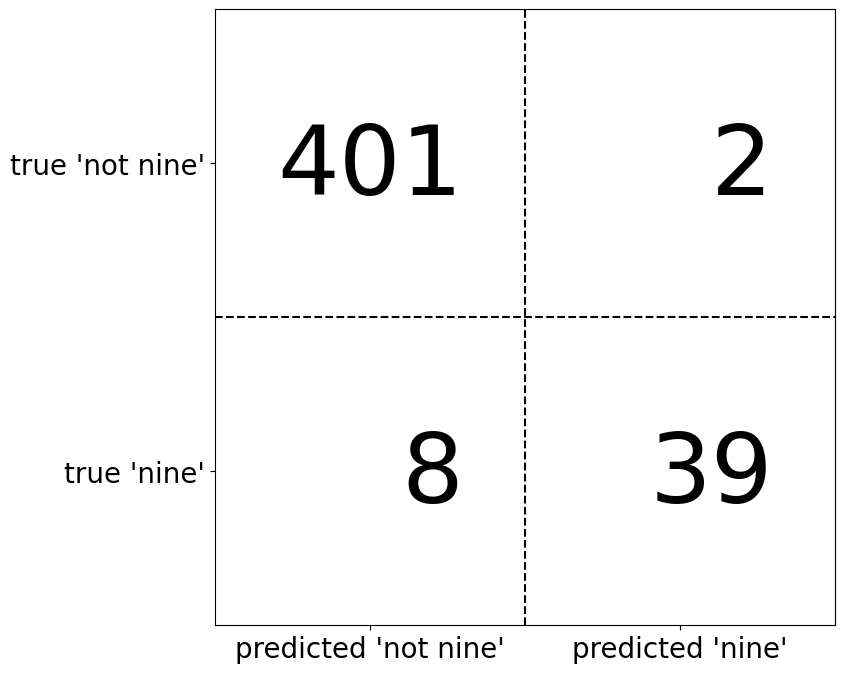

In [5]:
mglearn.plots.plot_confusion_matrix_illustration()

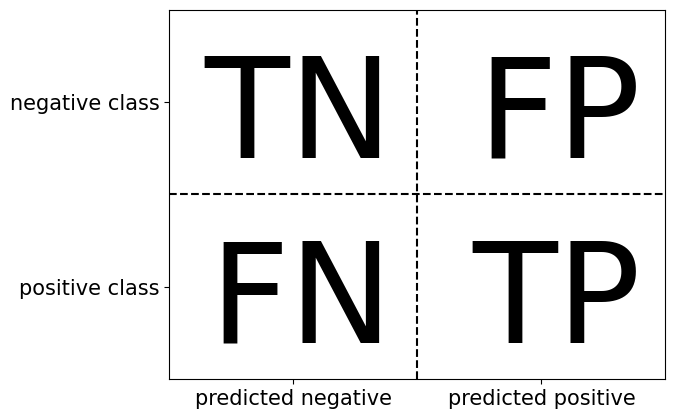

In [6]:
# On peut encore écrire la matrice de confusion en se servant du vocabulaire vrai/faux positifs/négatifs
mglearn.plots.plot_binary_confusion_matrix()

In [17]:
# Pour les besoins de la comparaison, on évalue un dummy avec une méthode d'évaluation random
dummy_random_classifier = DummyClassifier(strategy="stratified").fit(X_train,y_train)
pred_dummy = dummy_random_classifier.predict(X_test)
print("Random dummy score : {:.2f}".format(dummy_random_classifier.score(X_test,y_test)))


# En utilisant la matrice de confusion pour comparer les modèles précédents 


print("Classe la plus frequente : ")
print("{}".format(confusion_matrix(y_test,pred_most_frequent)))
print("Dummy : ")
print("{}".format(confusion_matrix(y_test,pred_dummy)))
print("Arbre de décision : ")
print("{}".format(confusion_matrix(y_test,pred_tree)))
print("Régression logisitique : ")
print("{}".format(confusion_matrix(y_test,log_reg_pred)))

Random dummy score : 0.83
Classe la plus frequente : 
[[403   0]
 [ 47   0]]
Dummy : 
[[347  56]
 [ 45   2]]
Arbre de décision : 
[[390  13]
 [ 24  23]]
Régression logisitique : 
[[401   2]
 [  8  39]]


In [19]:
# Afin d'évaluer les modèles on se sert des formules de précision : TP / TP + FP, de rappel : TP / TP + FN
# et f-score : 2 * (1 / precision + 1 / rappel )

from sklearn.metrics import f1_score
print("f1 score , classe plus fréquente : {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score , dummy random : {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score , arbre de décision : {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score , regression log : {:.2f}".format(f1_score(y_test, log_reg_pred)))

# La valeur de f_score condense les mesures de performances mais elle est difficile à expliquer

f1 score , classe plus fréquente : 0.00
f1 score , dummy random : 0.04
f1 score , arbre de décision : 0.55
f1 score , regression log : 0.89


In [26]:
# On peut calculer les trois 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy,target_names=['pas neuf','neuf']))

              precision    recall  f1-score   support

    pas neuf       0.89      0.86      0.87       403
        neuf       0.03      0.04      0.04        47

    accuracy                           0.78       450
   macro avg       0.46      0.45      0.46       450
weighted avg       0.80      0.78      0.79       450



In [25]:
# Et pour la régression : 
print(classification_report(y_test, log_reg_pred,target_names=['pas neuf','neuf']))

              precision    recall  f1-score   support

    pas neuf       0.98      1.00      0.99       403
        neuf       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
# La mesure f_score pour la classe "être un neuf" nous indique de bien meilleures performances de prédiction.
# L'indication est beaucoup moins tranchée lorsqu'on compare la recherche de la classe "non neuf"